In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib import offsetbox
import numpy as np
import sys
import time

# NOTE: make sure "path/to/datafold" is in sys.path or PYTHONPATH if datafold is not installed
from datafold.dynfold import DiffusionMaps
from datafold.utils.plot import plot_pairwise_eigenvector
import datafold.pcfold as pfol

In [2]:
from visualization import *
from data import *

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



# Word2Vec

In [3]:
import gensim

# Load Google's pre-trained Word2Vec model with desired limit
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True, limit=100000)
embedding_mat, labels = create_embedding_matrix(model)

In [4]:
# test class labels as array
word_array = ['Taylor_Swift', 'horizon', 'socks', 'God', 'fairy', 'Kanye_West', 'trump', 'Hollywood', 'ghost', 
              'dragon', 'Sinatra', 'Hulk', 'beach', 'Los_Angeles', 'New_York', 'horrible', 'dumb', 'Star_Wars', 
              'fashion', 'Chanel', 'fantasy', 'movies', 'Lebron', 'basketball', 'tennis', 'president', 'chocolate','language',
              'computer', 'space', 'game', 'kebab', 'evil', 'surgeon', 'Batman', 'Facebook', 'culinary', 'Pilates', 'clown', 
              'queen', 'Turkey', 'guitar', 'education', 'useful', 'sleep', 'coffee', 'ocean', 'theater', 'Germany','tequila',
              'soldier', 'biology', 'key','aquarium', 'engineer', 'lavender','Harry_Potter', 'sweater', 'dog', 'lipstick', 
              'pencil', 'Muse', 'neighbor', 'muffin', 'koala', 'zebra', 'oxygen', 'rainforest', 'Einstein', 'medical', 
              'Metallica']
# creating the test set, vl is the word embeddings
bl, vl, label_list = create_corpus(word_array, 1000, model)

### Use datafold diffusion maps to create 2D embedding
We followed tutorial given in: https://datafold-dev.gitlab.io/datafold/tutorial_04_basic_dmap_digitclustering.html

We adapted the given tutorial to our datasets.

In [5]:
X_pcm = pfold.PCManifold(vl) # test set as input
X_pcm.optimize_parameters(result_scaling=2)
print(f'epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}')

epsilon=1.5865374806371484, cut-off=5.40602445602417


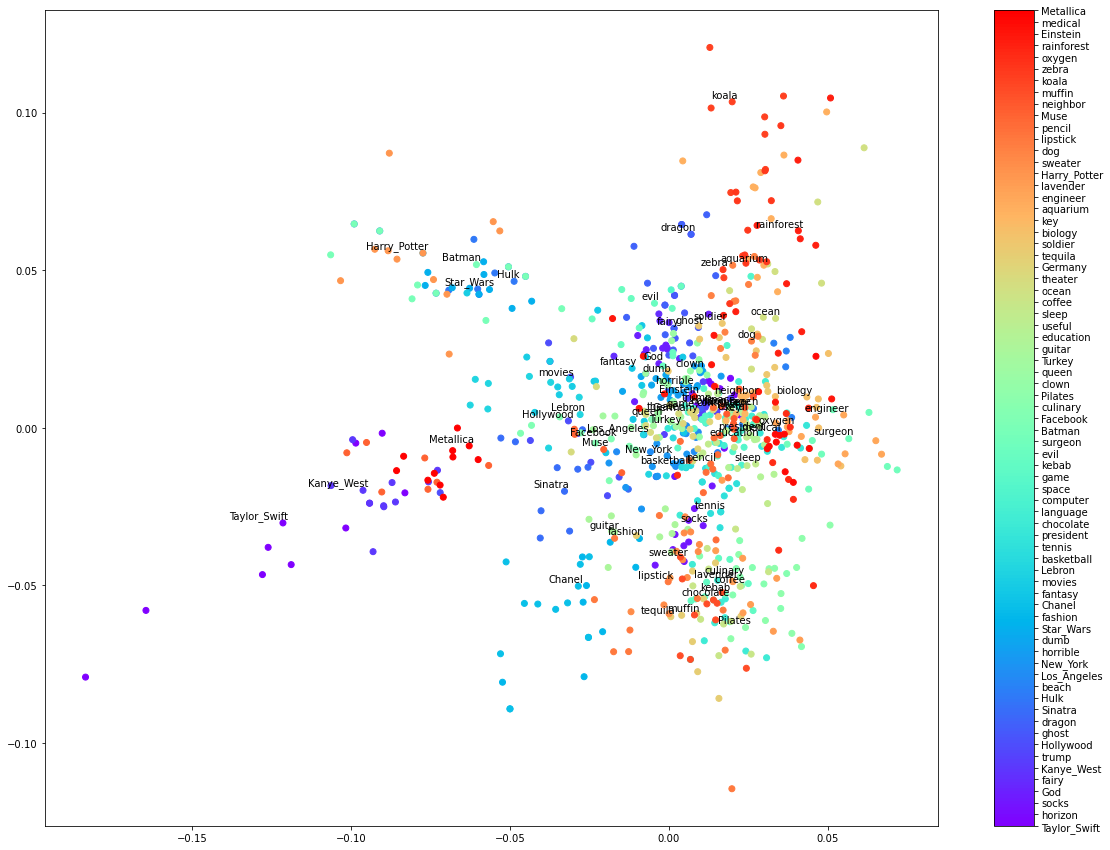

In [6]:
# create diffusion map embedding
dmap = DiffusionMaps(kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon), 
                     n_eigenpairs=6, dist_kwargs=dict(cut_off=X_pcm.cut_off))
dmap = dmap.fit(X_pcm)
dmap = dmap.set_coords([1, 2])
X_dmap = dmap.transform(X_pcm)
# plot the created embedding
plot_embedding(X_dmap, bl, label_list, text_data=True, p=11, figsize=(20, 15), name="datafold_250")

Eigenvec 1 vs 1


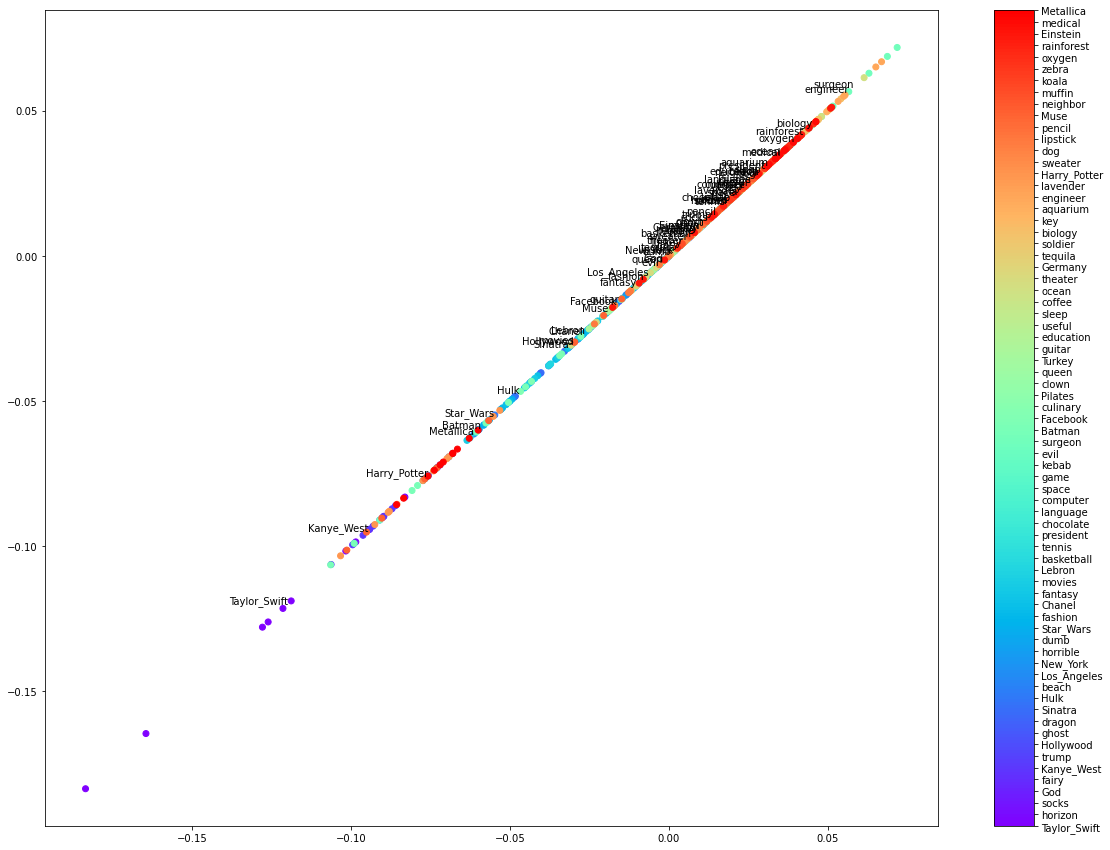

Eigenvec 1 vs 2


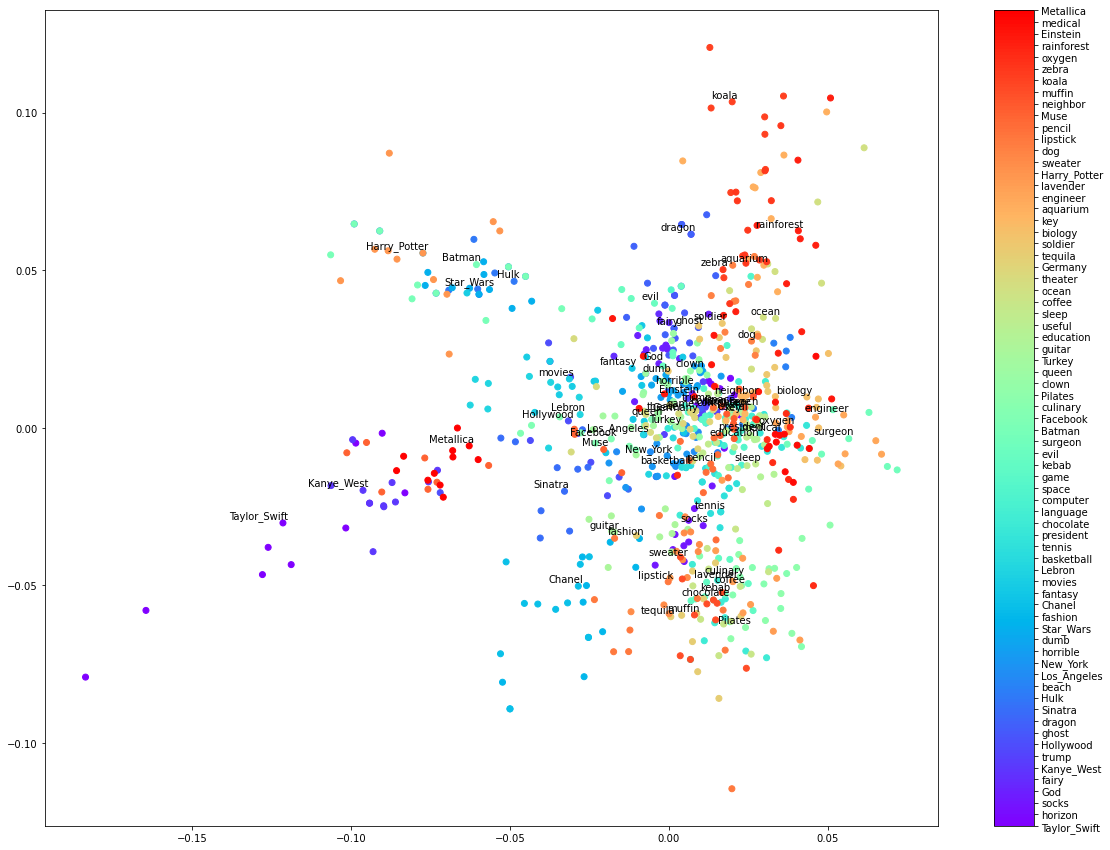

Eigenvec 1 vs 3


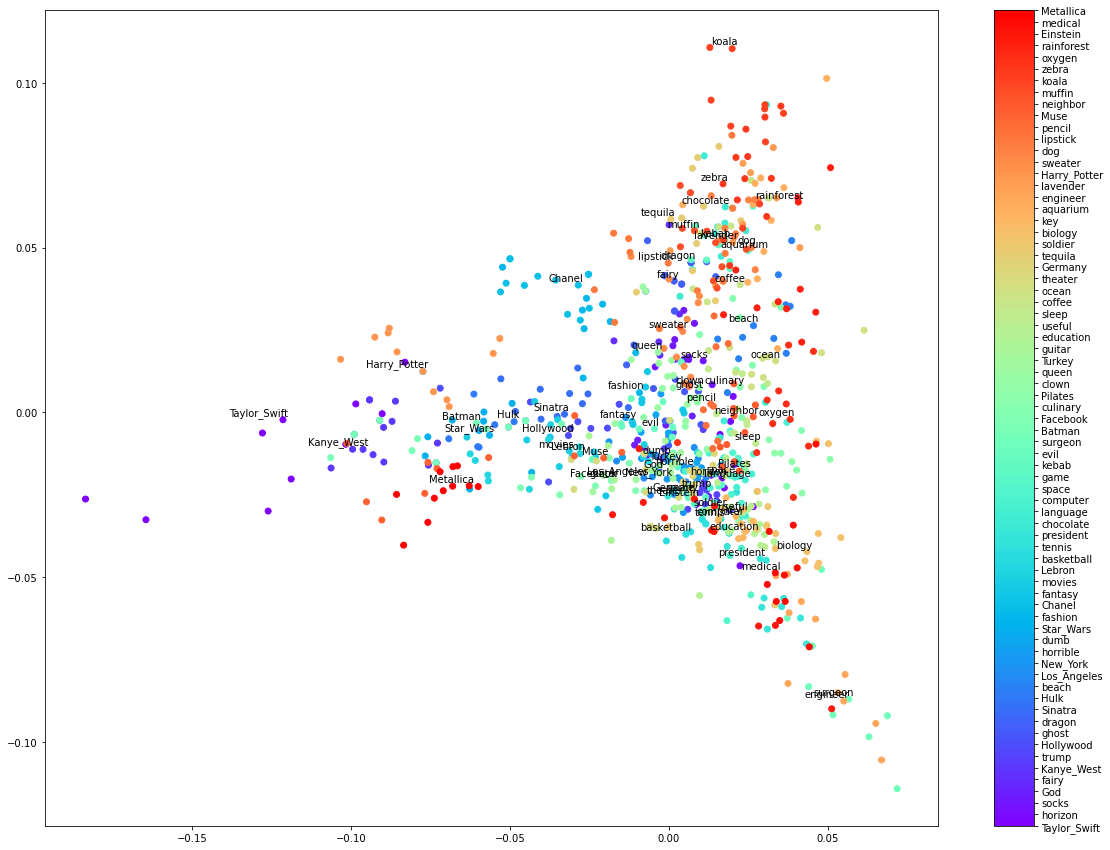

Eigenvec 1 vs 4


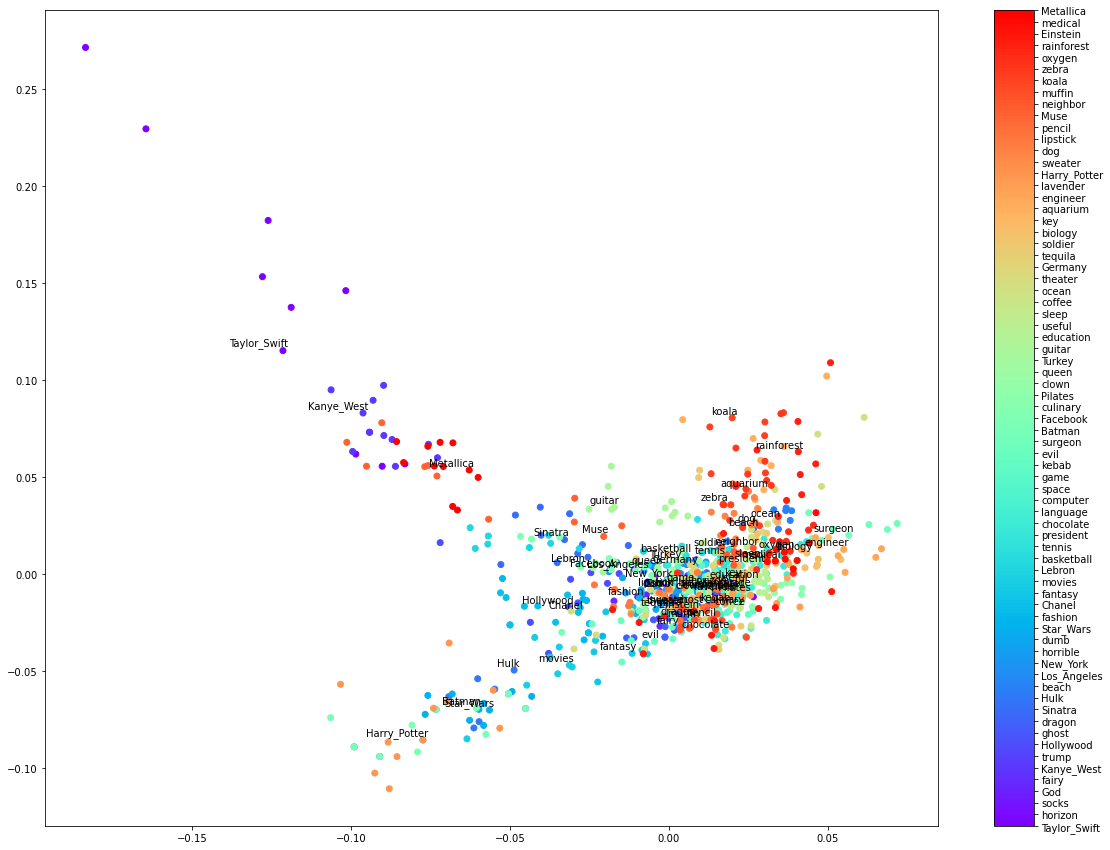

Eigenvec 2 vs 1


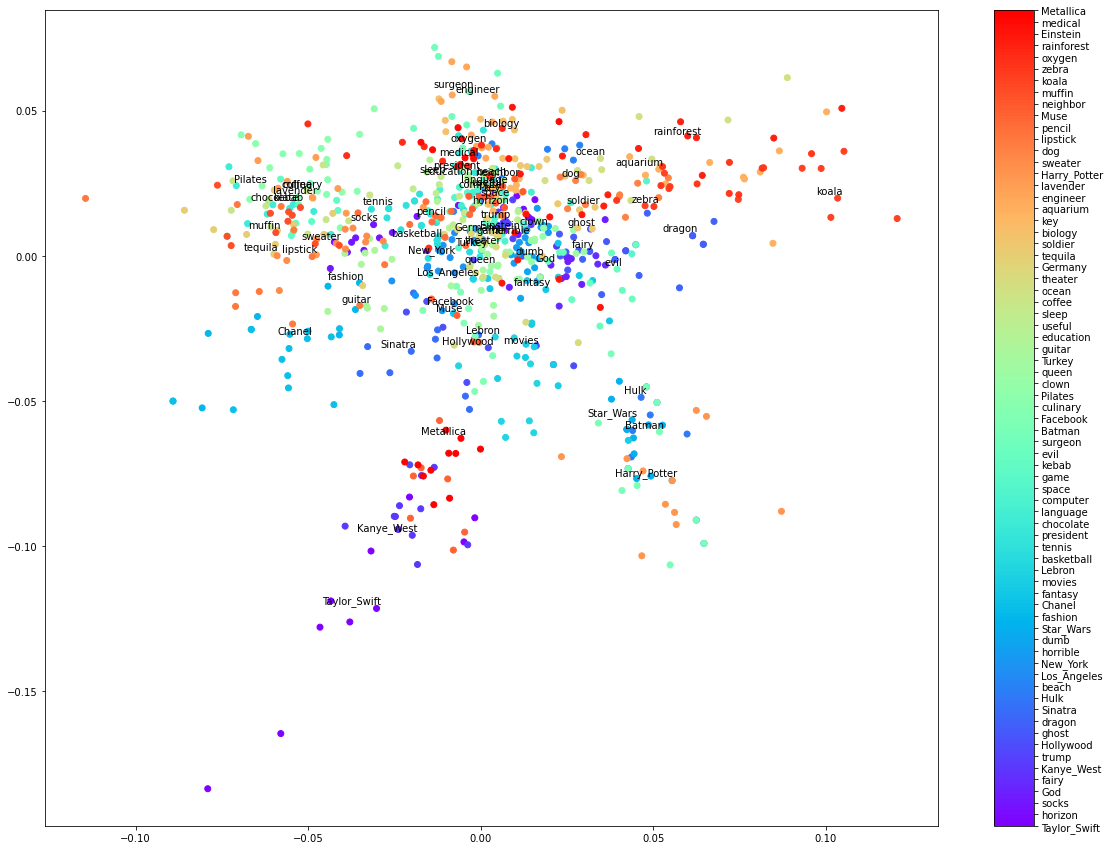

Eigenvec 2 vs 2


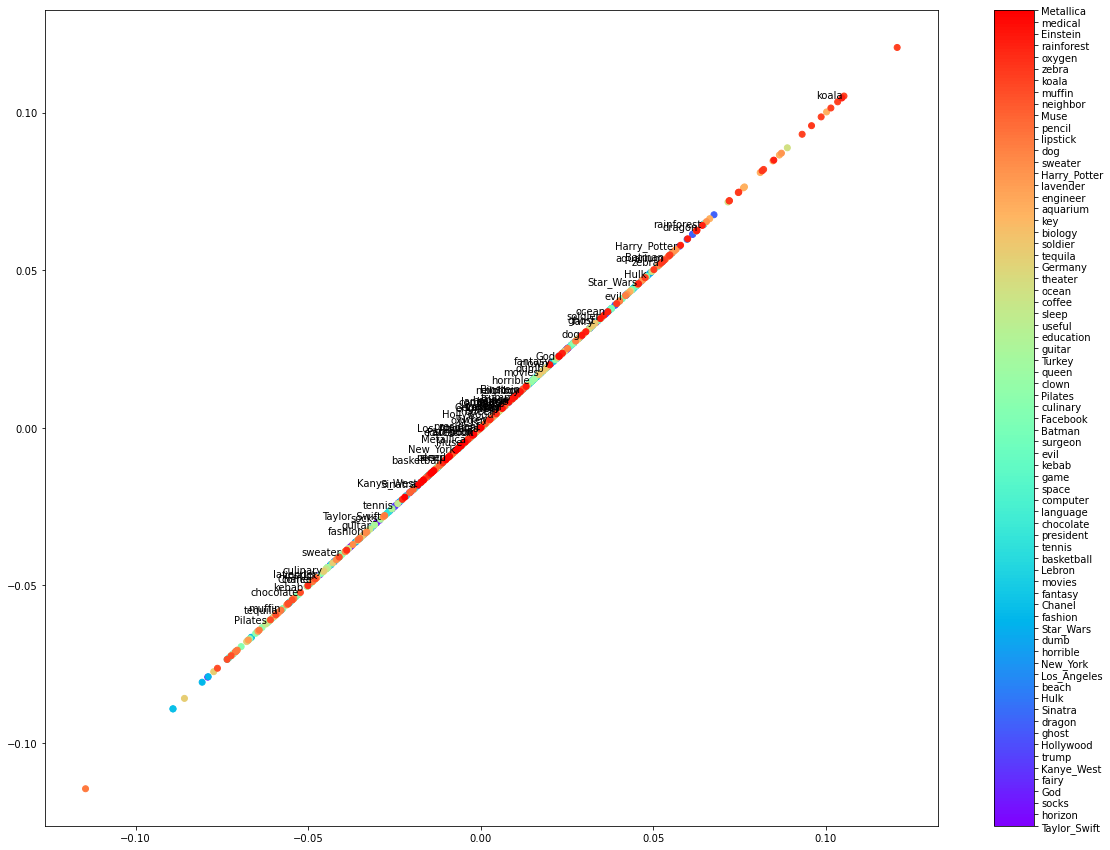

Eigenvec 2 vs 3


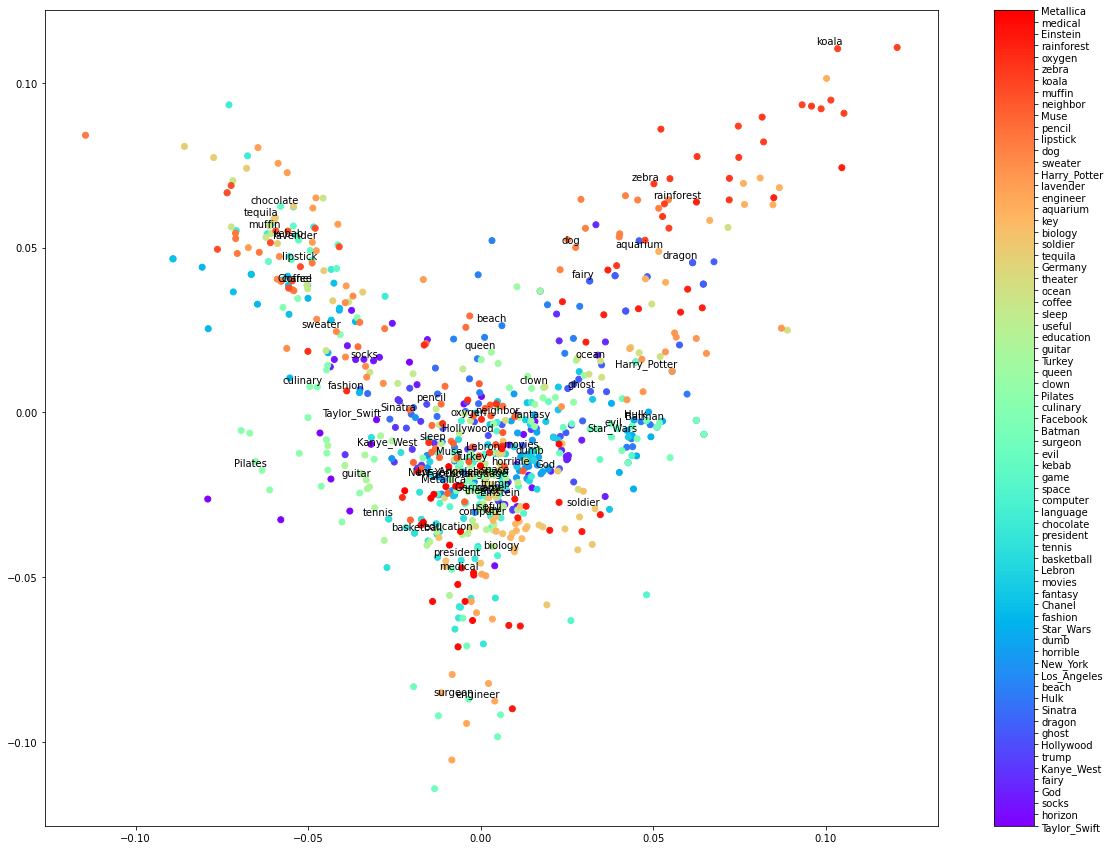

Eigenvec 2 vs 4


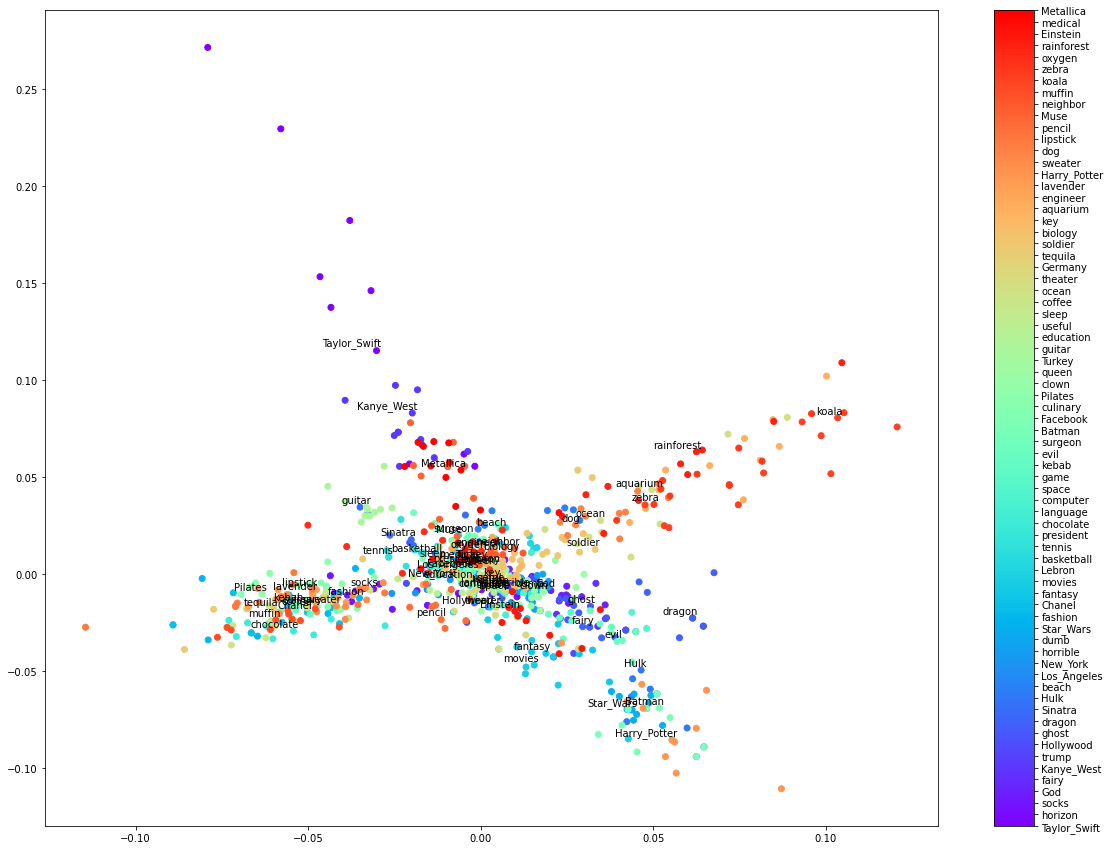

Eigenvec 3 vs 1


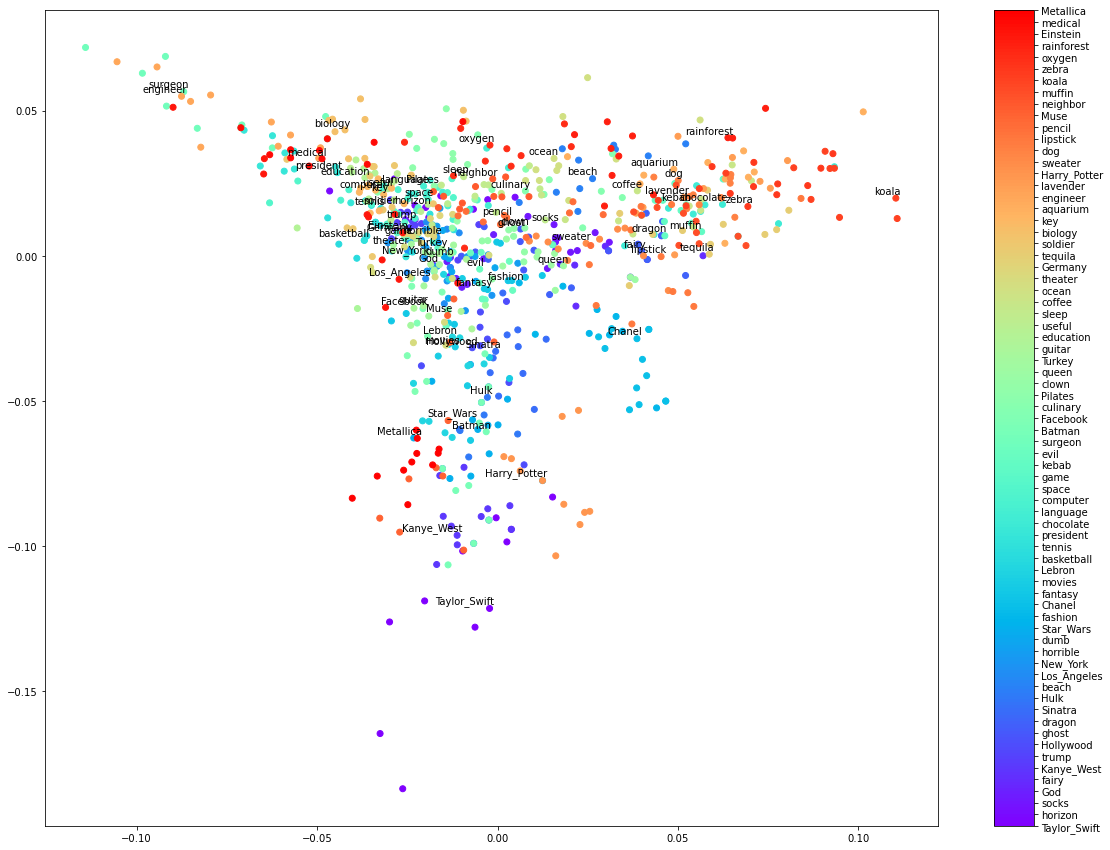

Eigenvec 3 vs 2


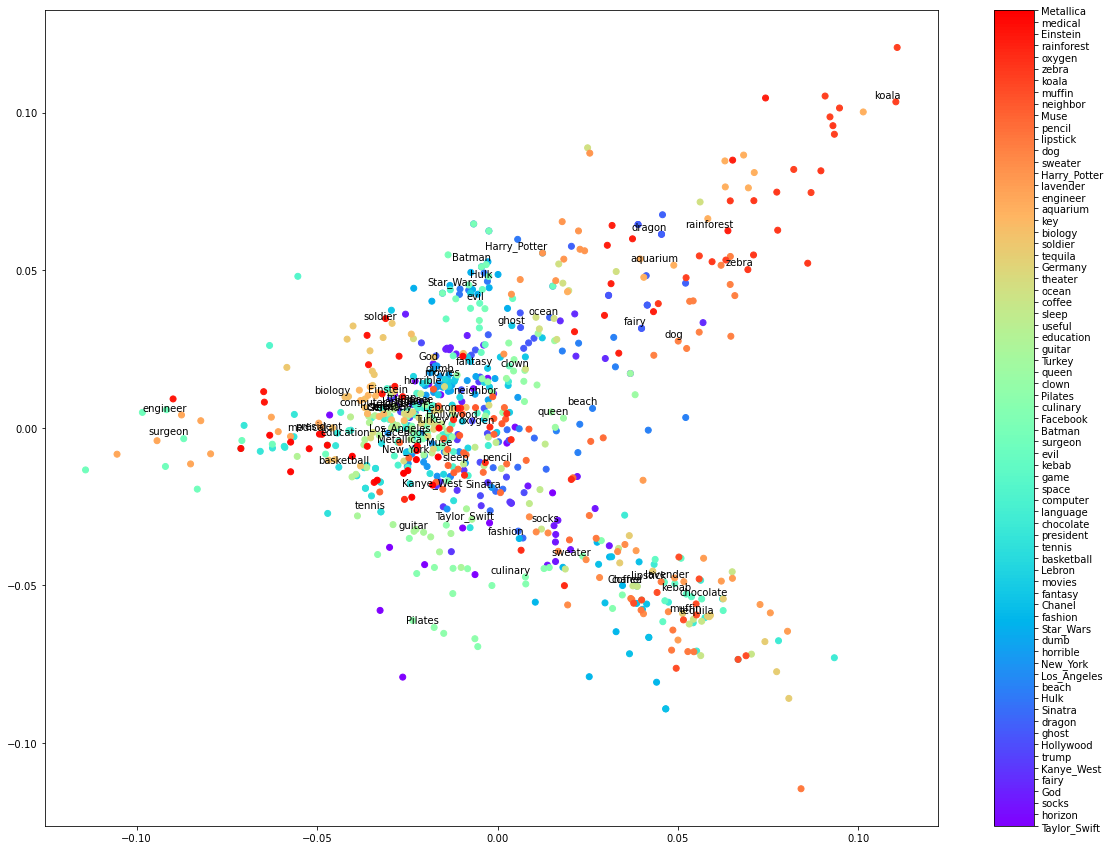

Eigenvec 3 vs 3


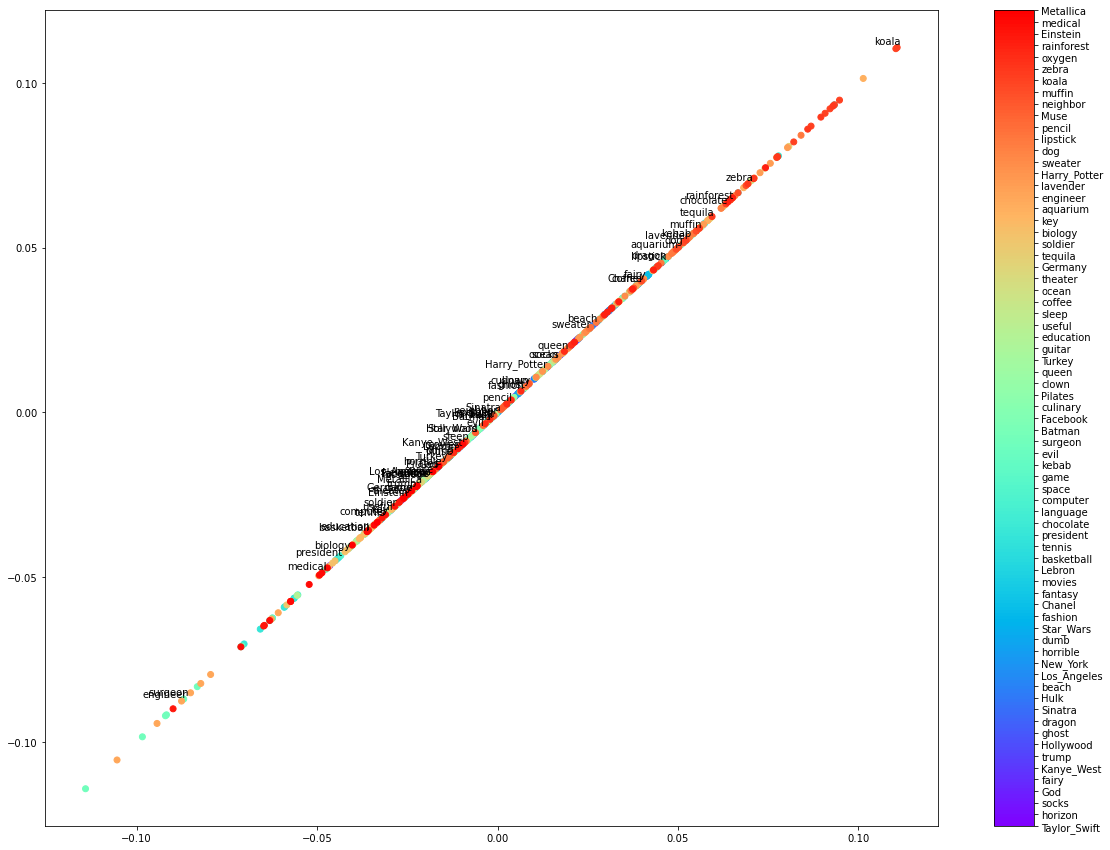

Eigenvec 3 vs 4


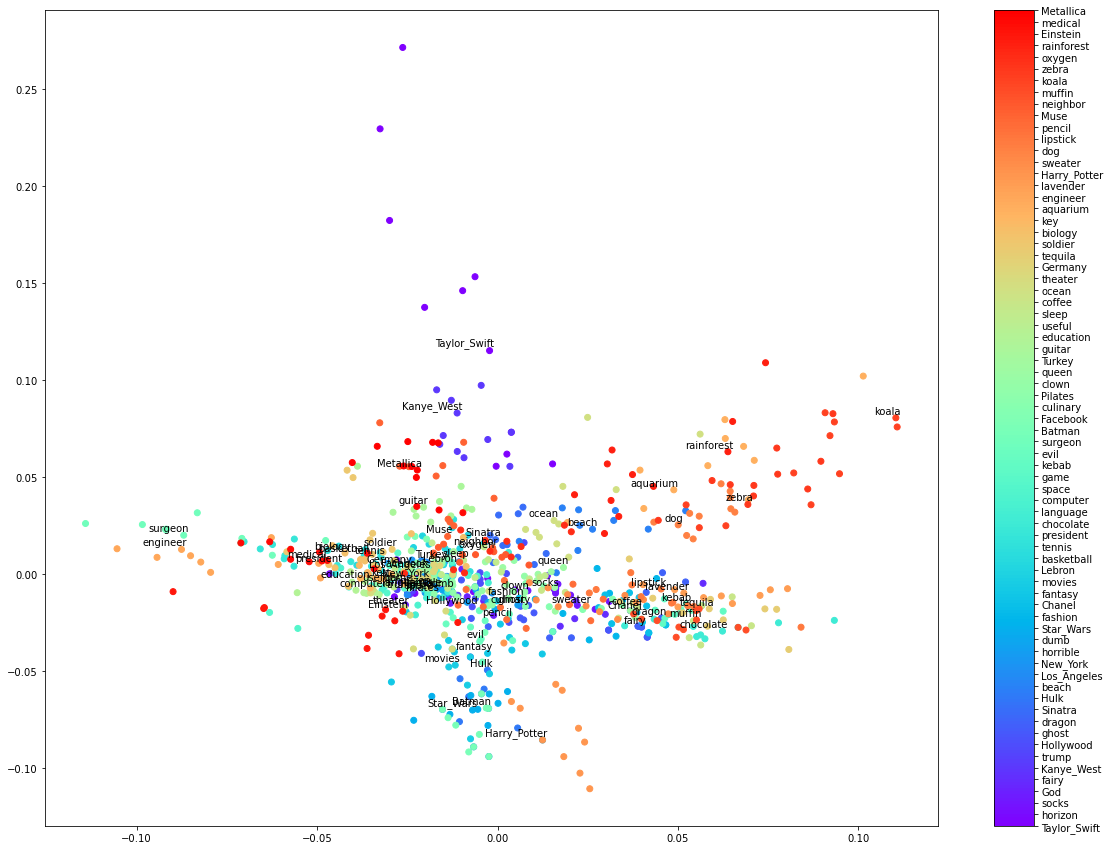

Eigenvec 4 vs 1


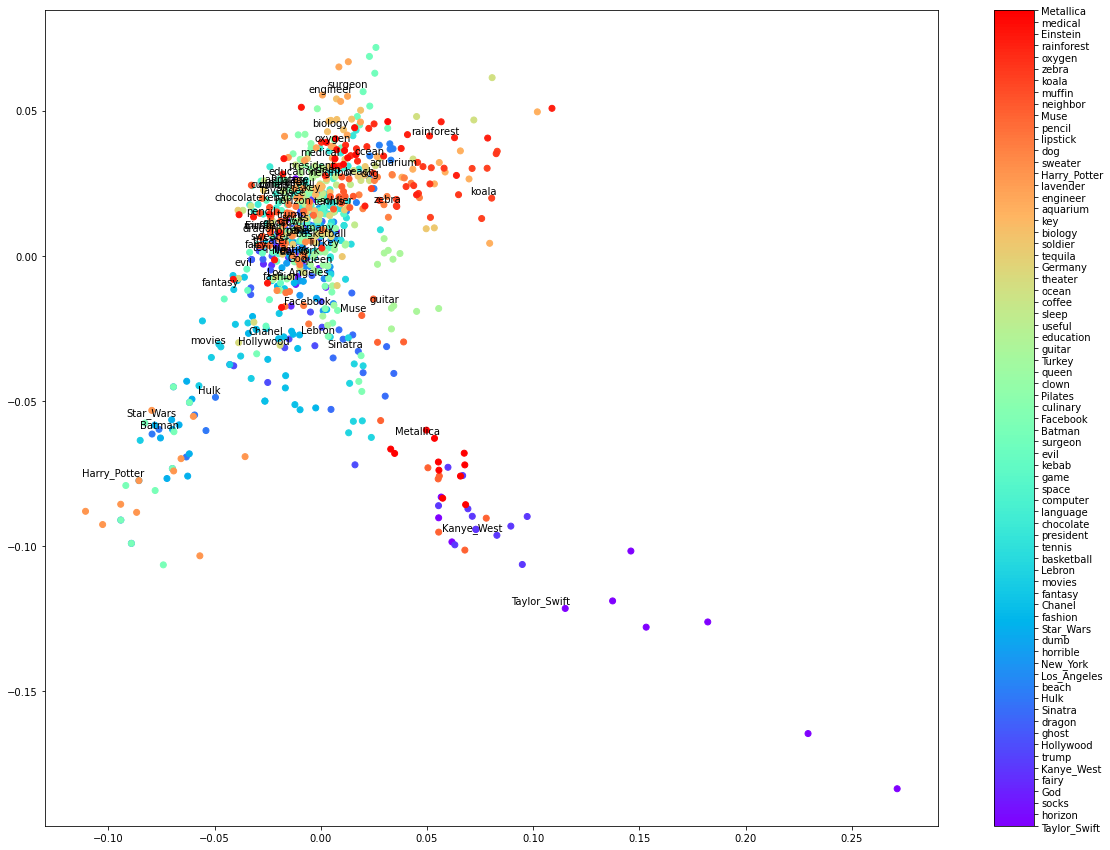

Eigenvec 4 vs 2


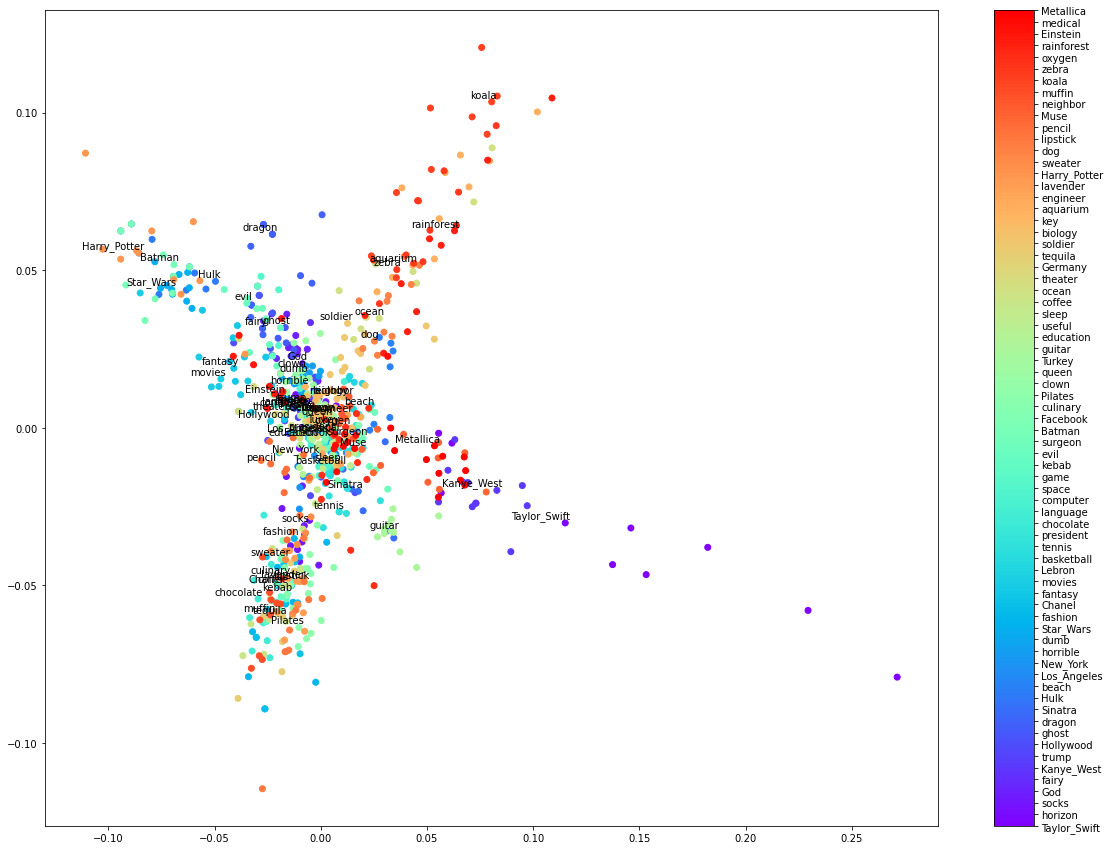

Eigenvec 4 vs 3


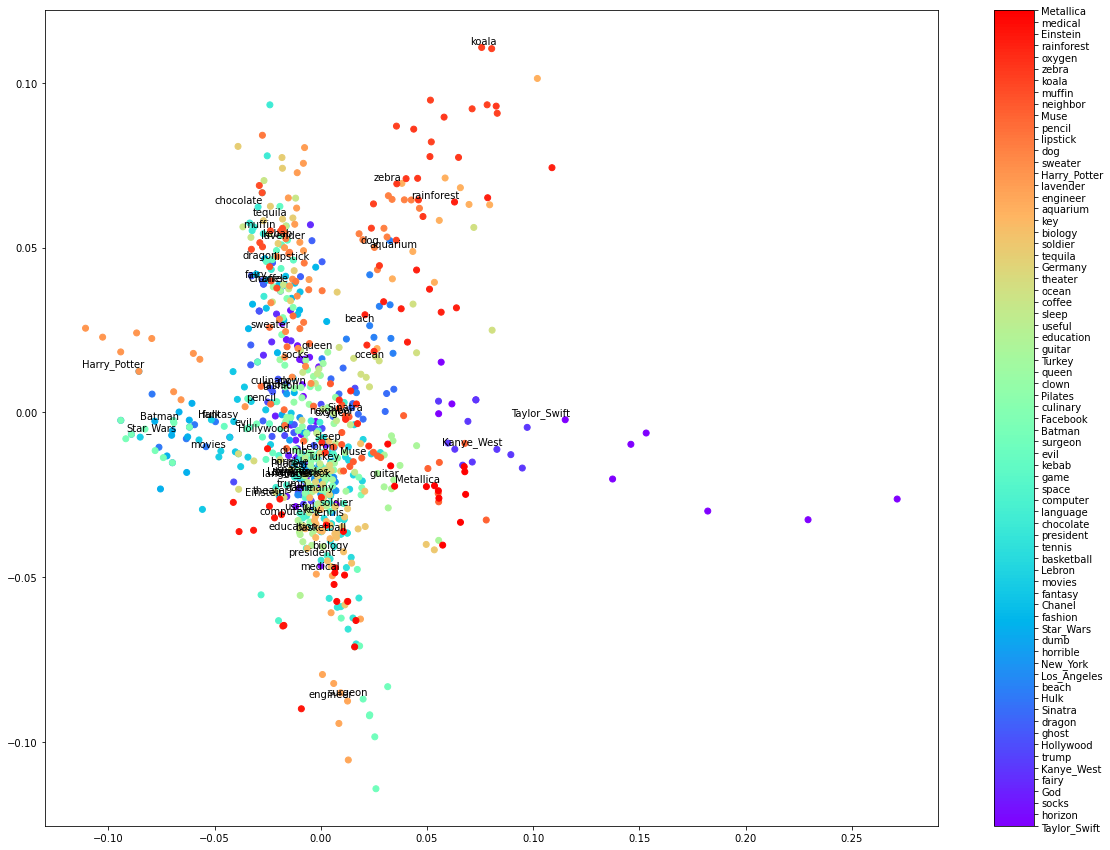

Eigenvec 4 vs 4


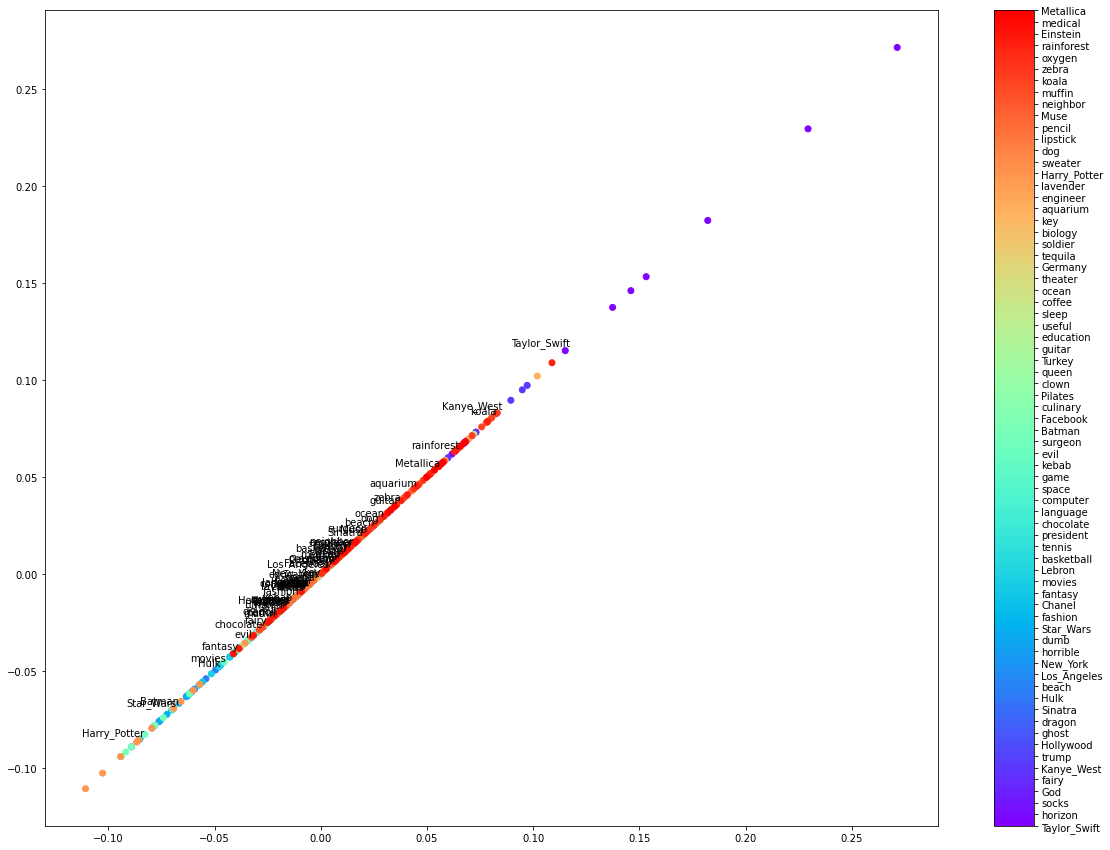

In [7]:
for i in range(1,5):
    for j in range(1,5):
        dmap = DiffusionMaps(kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon), 
                         n_eigenpairs=6, dist_kwargs=dict(cut_off=X_pcm.cut_off))
        dmap = dmap.fit(X_pcm)
        dmap2 = dmap.set_coords([i, j])
        X_dmap2 = dmap2.transform(X_pcm)
        # plot the created embedding
        print("Eigenvec " +str(i)+" vs " + str(j))
        plot_embedding(X_dmap2, bl, label_list, text_data=True, p=11, figsize=(20, 15), name="datafold_loop_"+str(i)+"_"+str(j))

### Apply PCA

In [9]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(vl)
word_pca_result = pca.transform(vl)

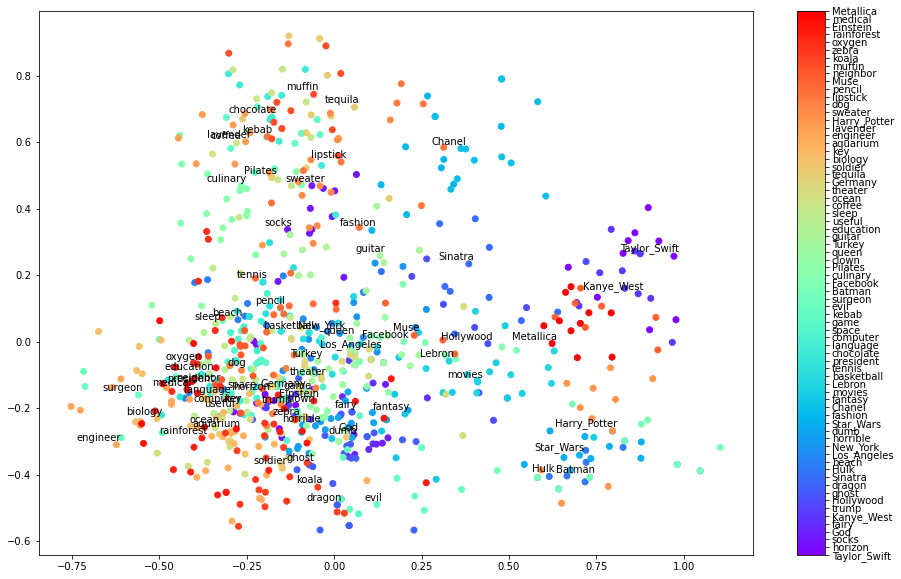

In [12]:
plot_embedding(word_pca_result, bl, label_list, text_data=True, p=11, name="word2vec_pca")

### Create embedding with TSNE

In [8]:
from sklearn.manifold import TSNE
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)

In [9]:
new_values = tsne_model.fit_transform(vl) # test set as input

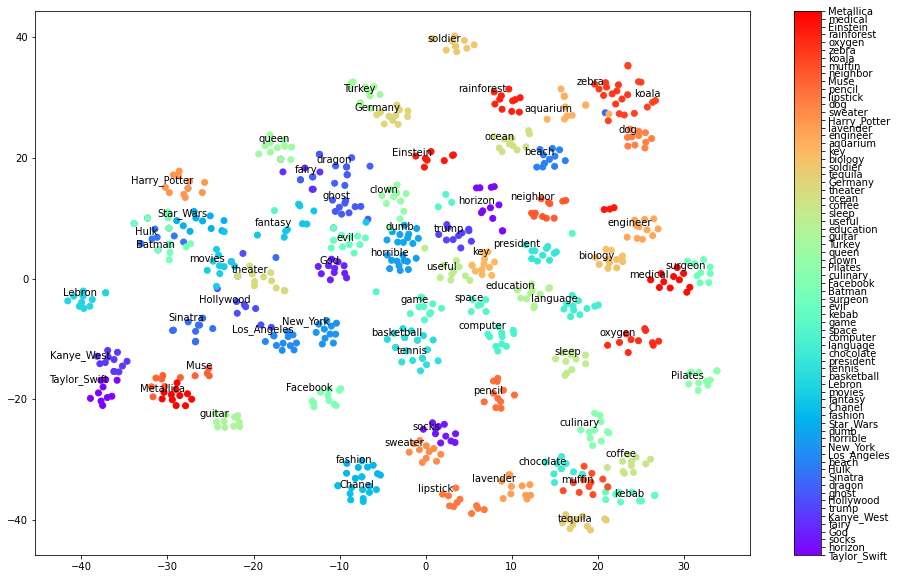

In [10]:
plot_embedding(new_values, bl, label_list, text_data=True, p=11, name="pca_250")

# CIFAR-10

In [13]:
cifar_data = tf.keras.datasets.cifar10.load_data()
train, test = cifar_data
train_x = train[0]
train_y = train[1]
test_x = test[0]
test_y = test[1]
cifar_labels =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [14]:
resized_train_x, resized_test_x = resize_images(train_x, test_x) # resize images

In [15]:
limit = 5000

In [16]:
X = resized_train_x[0:limit, :] # get limited number of sample in order to not overwhelm the method
y = train_y[0:limit,0]

In [17]:
cif_lab = []
for i in y:
    cif_lab.append(cifar_labels[y[i]]) # define string labels for each point

### CIFAR-10 with Datafold

In [15]:
X_pcm = pfold.PCManifold(X) # resized images as input
X_pcm.optimize_parameters(result_scaling=2)

print(f'epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}')

epsilon=27.724713581006412, cut-off=22.598851687491546


Eigenvec 1 vs 2


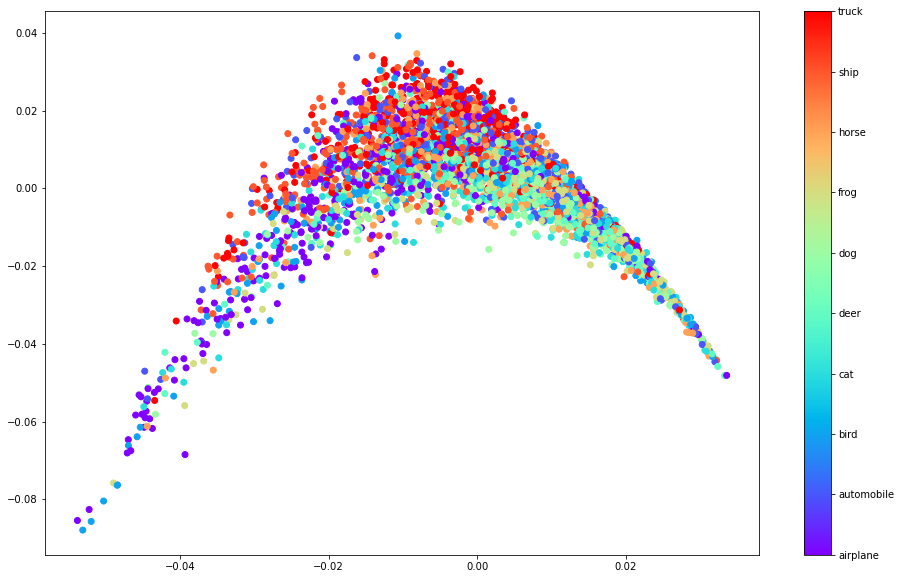

Eigenvec 1 vs 3


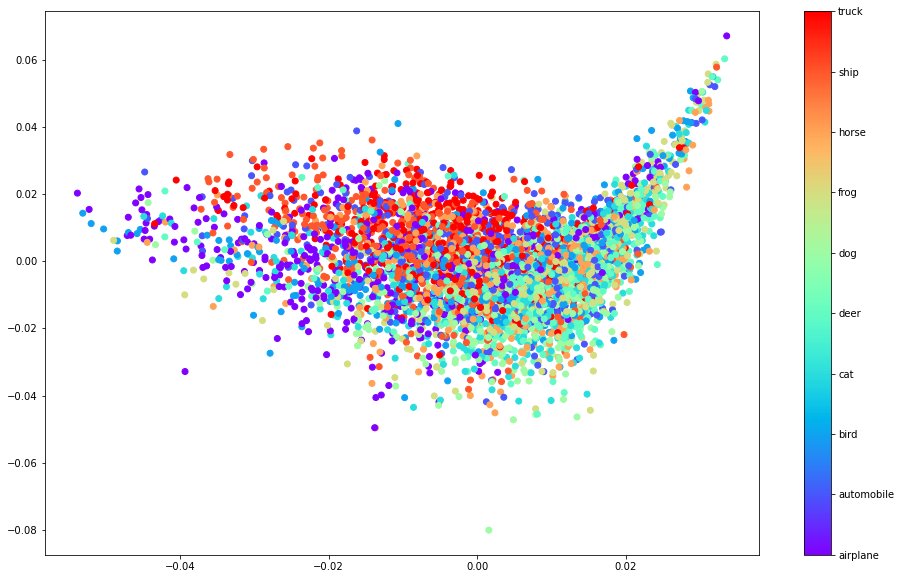

Eigenvec 1 vs 4


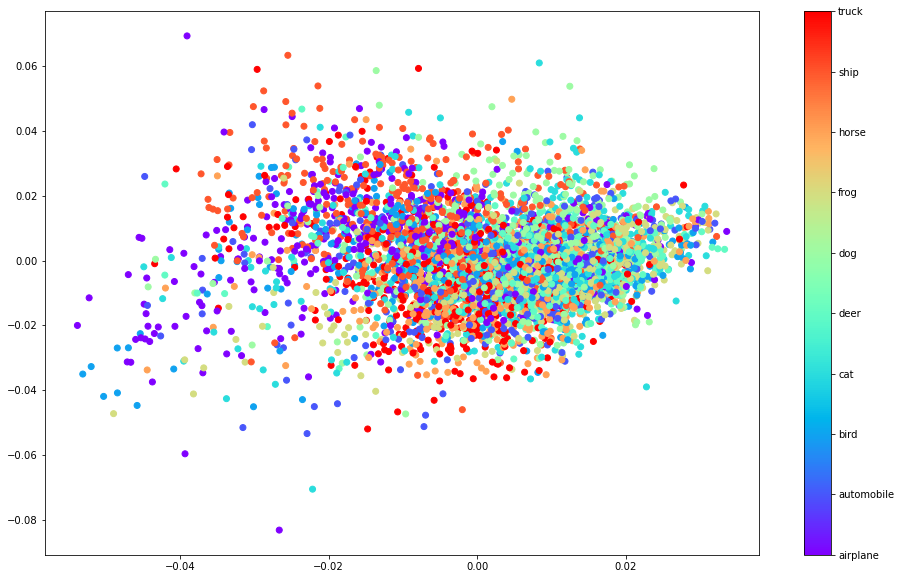

Eigenvec 2 vs 3


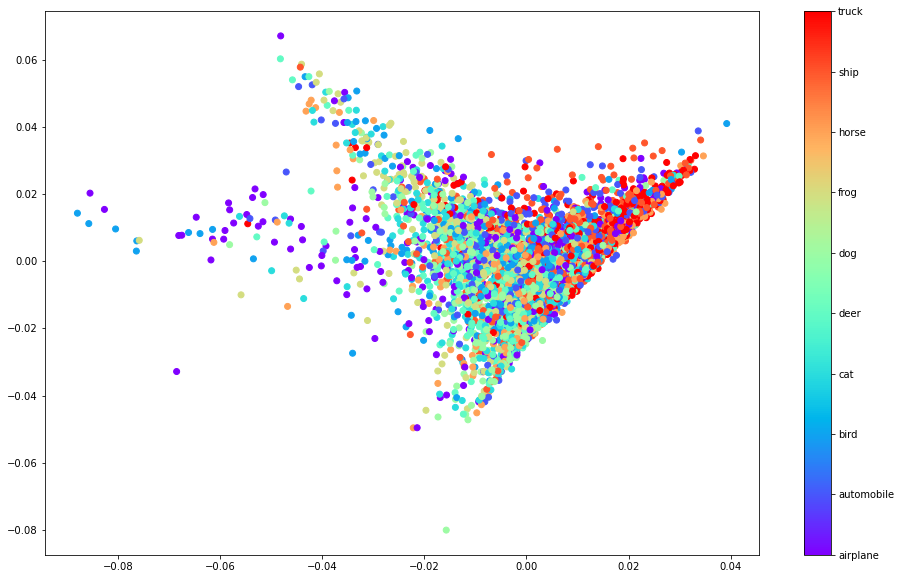

Eigenvec 2 vs 4


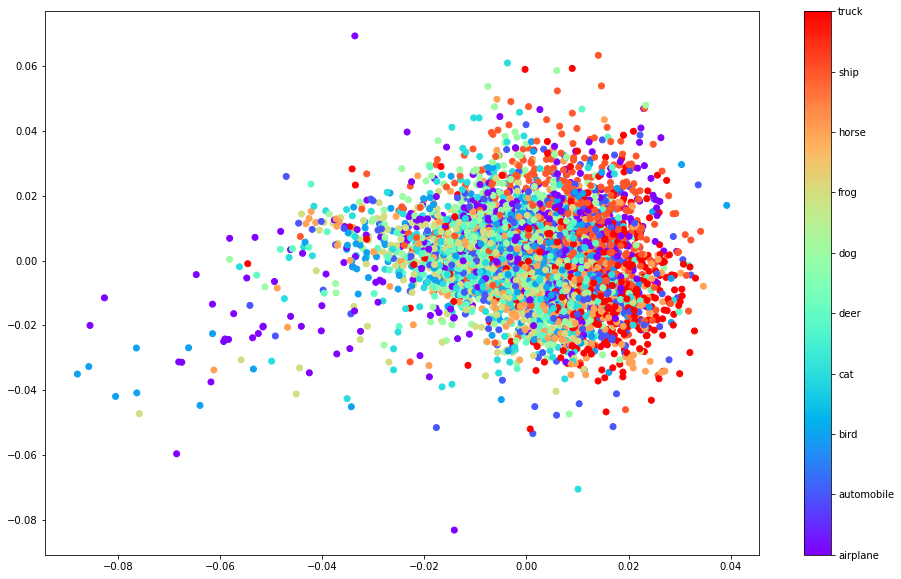

Eigenvec 3 vs 4


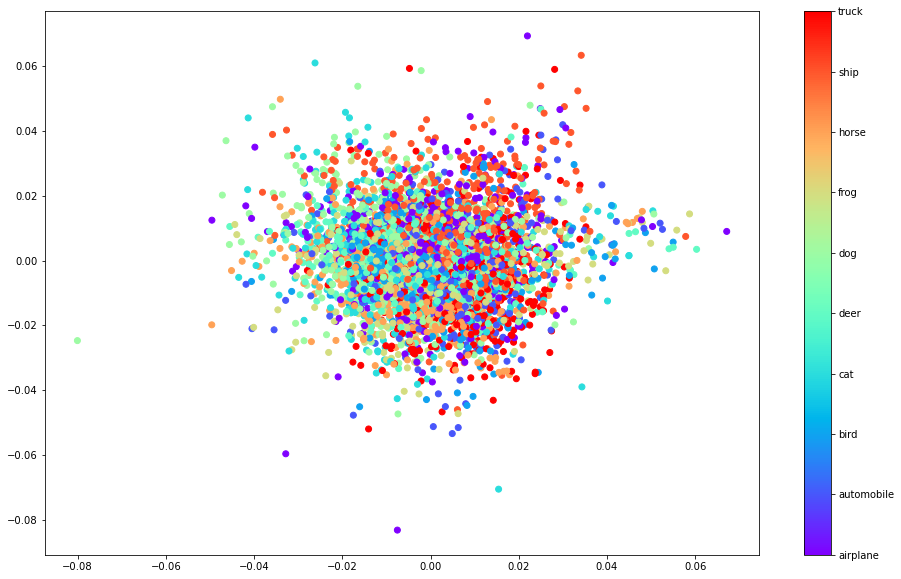

In [17]:
for i in range(1,6):
    for j in range(1,6):
        if i!=j and i<j:
            dmap = DiffusionMaps(kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon), 
                             n_eigenpairs=6, dist_kwargs=dict(cut_off=X_pcm.cut_off))
            dmap = dmap.fit(X_pcm)
            dmap2 = dmap.set_coords([i, j])
            X_dmap = dmap2.transform(X_pcm)
            # plot the created embedding
            print("Eigenvec " +str(i)+" vs " + str(j))
            plot_embedding(X_dmap, cif_lab, y, text_data=False, text_labels=cifar_labels, name="cifar_datafold_loop_"+str(i)+"_"+str(j))

### CIFAR-10 with PCA

In [18]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)
result = pca.transform(X)

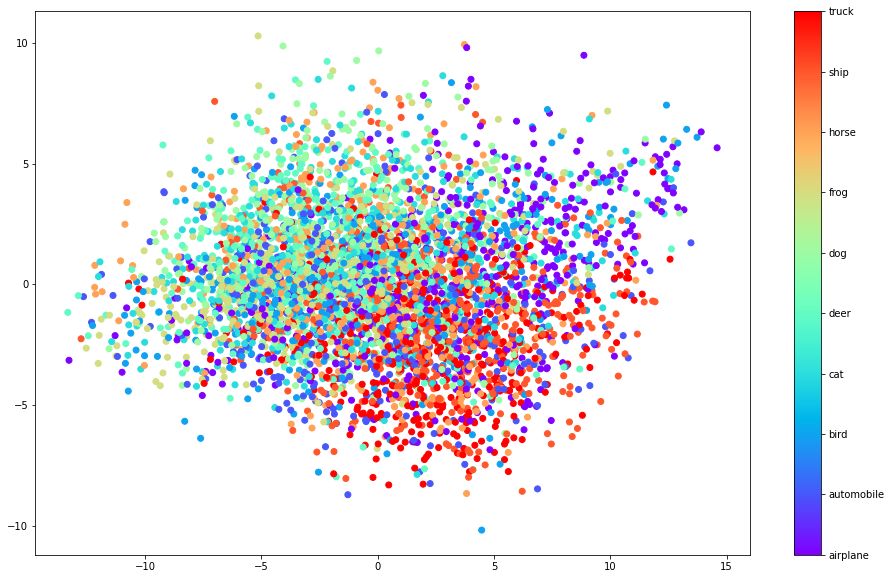

In [19]:
plot_embedding(result, cif_lab, y, text_data=False, text_labels=cifar_labels, name="cifar_real_pca_5000")

### CIFAR-10 with TSNE

In [18]:
cifar_tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)
cifar_values = tsne_model.fit_transform(X)

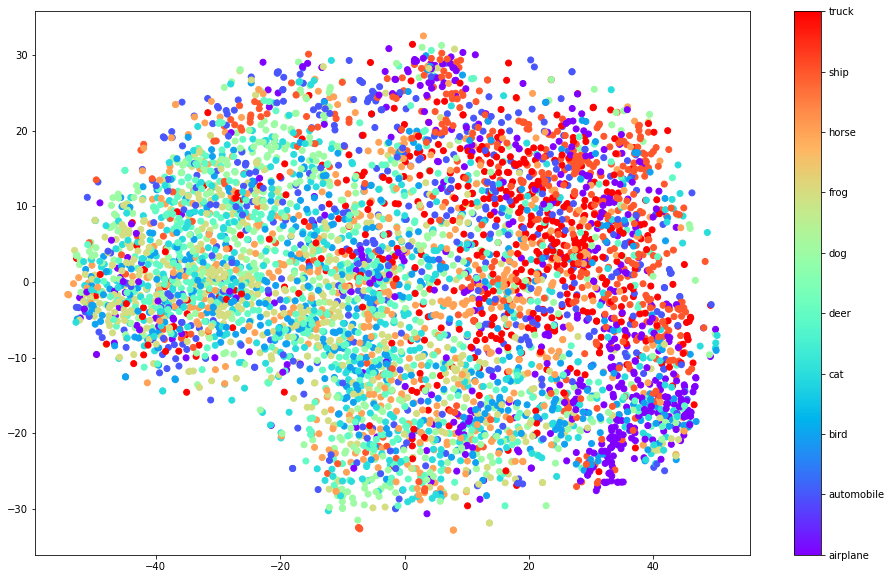

In [19]:
plot_embedding(cifar_values, cif_lab, y, text_data=False, text_labels=cifar_labels, name="cifar_pca_5000")

### Datafold Without reshaping

In [20]:
# trying with 1000 data points
X_notresized = train_x[0:1000, :]
y_notresized = train_y[0:1000, 0]

In [21]:
X_notresized = X_notresized.reshape(-1, 32*32*3)

In [22]:
X_pcm = pfold.PCManifold(X_notresized)
X_pcm.optimize_parameters(result_scaling=2)

print(f'epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}')

dmap = DiffusionMaps(kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
                     n_eigenpairs=6, dist_kwargs=dict(cut_off=X_pcm.cut_off))

dmap = dmap.fit(X_pcm)
dmap = dmap.set_coords([1, 2])
X_dmap_notresized = dmap.transform(X_pcm)

epsilon=5581621.299948731, cut-off=10139.88481196902


In [23]:
cif_lab_notresized = []
for i in y:
    cif_lab.append(cifar_labels[y_notresized[i]]) # define string labels for each point

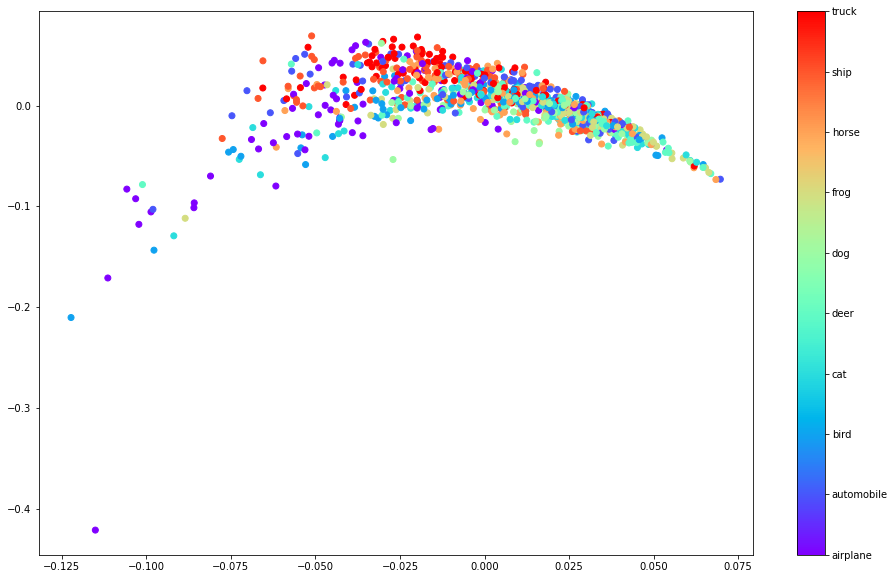

In [24]:
plot_embedding(X_dmap_notresized, cif_lab_notresized, y_notresized, text_data=False, text_labels=cifar_labels, name="cifar_1000_full")